In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.set_option('display.max_colwidth', None)

In [158]:
# load datasets
exps = [
    {
        'name': 'duo-chat with mistral',
        'dataset': 'code-generation',
        'path':'/Users/bruno/Downloads/code_explanation_v3_20240627_124851__independent_llm_judge-00000-of-00001.csv'
    },
    {
        'name': 'duo-chat with mistral',
        'dataset': 'code-explanation',
        'path':'/Users/bruno/Downloads/code_explanation_v3_20240627_124851__independent_llm_judge-00000-of-00001.csv'
    },
    {
        'name': 'duo-chat with mistral',
        'dataset': 'code-documentation',
        'path':'/Users/bruno/Downloads/code_explanation_v3_20240627_124851__independent_llm_judge-00000-of-00001.csv'
    },
]

In [159]:
dfs = []
for exp in exps:
    _df = pd.read_csv(exp['path'])
    _df['answering_model'] = exp['name']
    _df['dataset'] = exp['dataset']
    _df.drop(columns=['final_prompt_for_evaluating_model'], inplace=True)
    dfs.append(_df)
df = pd.concat(dfs)    

In [160]:
# Show a single row
df.head(1)

question              context        answering_model  \
0  Explain this code  Cartfile.resolved\n  duo-chat with mistral   

                                                                                                  final_prompt_for_answering_model  \
0  {"content": "Explain this code\nCartfile.resolved\n\n", "resource_type": null, "resource_id": null, "with_clean_history": true}   

                                                                                                                                                                                                                                                                                             answer  \
0  The `Cartfile.resolved` file lists the installed dependencies for each software package in your system that was installed via Homebrew. This file is automatically generated by Homebrew and helps keep track of the installed dependencies, their versions, and any dependencies they may have.   

        evaluating_model  correctness  readability  comprehensiveness  \
0  text-bison-32k@latest            3            3                  2   

                                                                                                              explanation  \
0  The answer is good but it could be improved by providing more details about the content of the Cartfile.resolved file.   

                         llm_error                        created_at  \
0  This field should be deprecated  2024-06-27 10:49:29.759004+00:00   

           dataset  
0  code-generation

# Average of metrics per test

In [161]:
df_all = df.groupby(['answering_model', 'dataset']).agg(
    avg_correctness=('correctness', 'mean'),
    avg_readability=('readability', 'mean'),
    avg_comprehensiveness=('comprehensiveness', 'mean'),
    n_test_cases=('answering_model', 'count')
).round(2)
df_all.sort_values(['answering_model', 'dataset'])

avg_correctness  avg_readability  \
answering_model       dataset                                                
duo-chat with mistral code-documentation             2.83              3.1   
                      code-explanation               2.83              3.1   
                      code-generation                2.83              3.1   

                                          avg_comprehensiveness  n_test_cases  
answering_model       dataset                                                  
duo-chat with mistral code-documentation                   2.51           345  
                      code-explanation                     2.51           345  
                      code-generation                      2.51           345

# Distribution of criteria

In [162]:
criteria = 'correctness'
value_counts = df.groupby(['answering_model', 'dataset'])[criteria].value_counts().unstack().fillna(0)

possible_values = [1, 2, 3, 4]
value_counts = value_counts.reindex(columns=possible_values, fill_value=0)
value_counts.sort_values(['answering_model', 'dataset'])

correctness                                1  2    3    4
answering_model       dataset                            
duo-chat with mistral code-documentation  86  0  145  114
                      code-explanation    86  0  145  114
                      code-generation     86  0  145  114

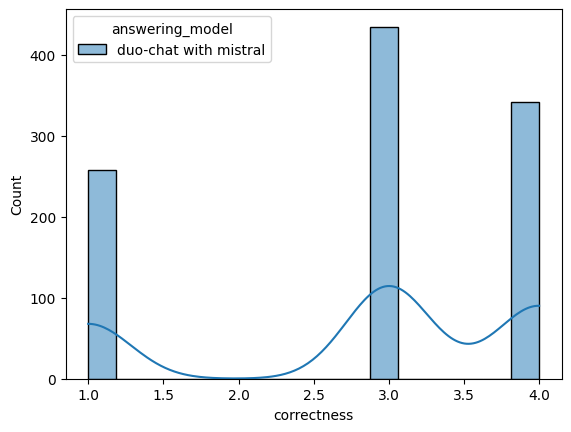

In [7]:
sns.histplot(data=df, x='correctness', hue='answering_model', multiple='dodge', kde=True);

## Number of evaluation failures

In [8]:
# select relevant columns
cols = ['answering_model', 'final_prompt_for_answering_model', 'correctness', 'answer', 'llm_error', 'explanation']
_df = pd.concat(dfs)[cols]

# apply filter
_df_failures = _df[pd.isna(_df['correctness'])]


print(f'Total failures: {len(_df_failures)} out of {len(_df)} ({round(len(_df_failures)/len(_df) * 100, 0)}%)')

# show some examples, if any
_df_failures.head(3)

Total failures: 0 out of 1035 (0.0%)


Empty DataFrame
Columns: [answering_model, final_prompt_for_answering_model, correctness, answer, llm_error, explanation]
Index: []

# Explore worst performers

In [9]:
df[df["correctness"] <= 1][["question", "context", "answering_model", "answer", "correctness", "readability", "comprehensiveness"]]

question  \
3    Explain this code   
11   Explain this code   
15   Explain this code   
21   Explain this code   
22   Explain this code   
..                 ...   
315  Explain this code   
327  Explain this code   
329  Explain this code   
333  Explain this code   
336  Explain this code   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              context  \
3                                                                                                                                                                                                                            /// <reference types="vitest" />\n/// <reference types="vite/client" />\n\nimport react from "@vitejs/plugin-react";\nimport tsconfigPaths from "vite-tsconfig-paths";\nimport { defineConfig } from "vitest/config";\n\nexport default defineConfig({\n  plugins: [react(), tsconfigPaths()],\n  test: {\n    globals: true,\n    environment: "happy-dom",\n    setupFiles: ["./test/setup-test-env.ts"],\n  },\n});\n   
11                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         class WelcomeController < ApplicationController\n  def index\n  end\nend\n   
15                                                                                                                                                                                                                                     # README\n\nThis README would normally document whatever steps are necessary to get the\napplication up and running.\n\nThings you may want to cover:\n\n* Ruby version\n\n* System dependencies\n\n* Configuration\n\n* Database creation\n\n* Database initialization\n\n* How to run the test suite\n\n* Services (job queues, cache servers, search engines, etc.)\n\n* Deployment instructions\n\n* ...\n   
21                                                                                                                                                                                                                                    ENV['RAILS_ENV'] ||= 'test'\nrequire_relative "../config/environment"\nrequire "rails/test_help"\n\nclass ActiveSupport::TestCase\n  # Run tests in parallel with specified workers\n  parallelize(workers: :number_of_processors)\n\n  # Setup all fixtures in test/fixtures/*.yml for all tests in alphabetical order.\n  fixtures :all\n\n  # Add more helper methods to be used by all tests here...\nend\n   
22                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       xcode_source = 